# Defining a target with multiple stocks
## Goal
* Quantify how good our models have to be if we have one model for each stock in Dow Jones
* In this set up, each model is trying to predict if the asset is going to be higher in exactly 20 mins when compared to the next minute.

## Main takeouts



In [ ]:
cd ~/Desktop/MyProjects/moneyManager/

In [ ]:
# need many imports !
import matplotlib.pyplot as plt
import pandas as pd
from modelBenchMark.strategySimulator import simulateStrategyMultipleTimes
from modelBenchMark.strategySimulator import testCaseForModelSimulator

In [ ]:
stratOutcome, stratMoves = simulateStrategyMultipleTimes(precision=0.57, recall=0.02, availableStocks=['GS', 'MSFT', 'IBM'], numSimulations=100)
randOutcome, randMoves = simulateStrategyMultipleTimes(precision=0.5, recall=0.02, availableStocks=['GS', 'MSFT', 'IBM'], numSimulations=100)

Text(0.5, 1.0, 'Performance of strategies with precision=0.5 and precision=0.6')

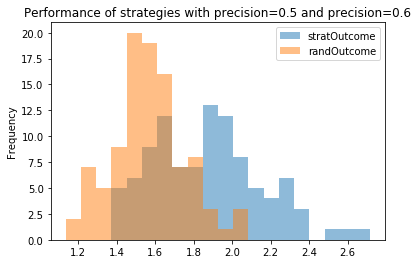

In [11]:
dr = pd.DataFrame({'stratOutcome':stratOutcome, 'randOutcome': randOutcome})
dr.plot.hist(bins=20, alpha=0.5);
plt.title('Performance of strategies with precision=0.5 and precision=0.6')

Text(0.5, 1.0, 'Number of movements of strategies with precision=0.5 and precision=0.6')

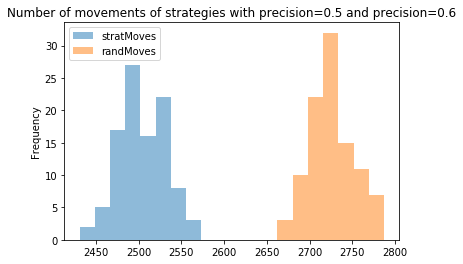

In [12]:
dm = pd.DataFrame({'stratMoves':stratMoves, 'randMoves': randMoves})
dm.plot.hist(bins=20, alpha=0.5);
plt.title('Number of movements of strategies with precision=0.5 and precision=0.6')

In [13]:
# just checks how was the gain of GS, IBM, MSFT
winGS = testCaseForModelSimulator('GS')
winIBM = testCaseForModelSimulator('IBM')
winMSFT = testCaseForModelSimulator('MSFT')

In [14]:
print(winGS, winIBM, winMSFT)

1.4279697238153024 1.2532322094050923 1.6108618098927572


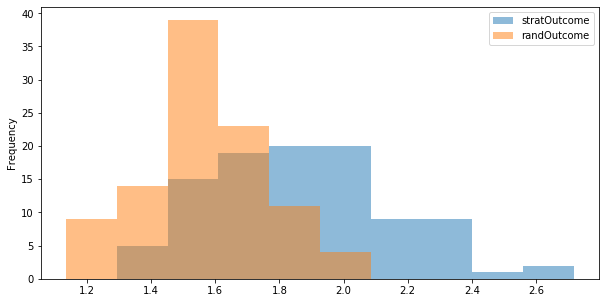

In [15]:
plt.close('all')
dr.plot.hist(bins=10, alpha=0.5);
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [16]:
difference = dr.stratOutcome-dr.randOutcome

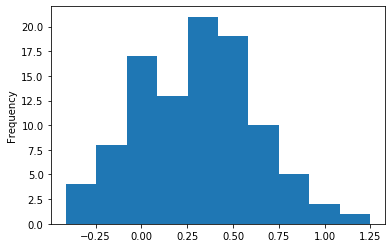

In [17]:
difference.plot.hist()

In [23]:
from marketUtilities.loadTimeSeries import getListOfAvailableStocks
from marketUtilities.loadTimeSeries import loadPriceTimeSeries


In [38]:
def createBalancedTargetFromTimeSeries(s, memSize=120):
    """ Sweet and elegant.
    """
    d=(s.shift(-20)-s.shift(-1))
    rollingMean = d.rolling(memSize).mean()
    return (d>rollingMean)

print('running this')
availableStocks=['GS', 'MSFT', 'IBM']
priceTimeSeries = loadPriceTimeSeries(stockList=availableStocks)
bestPossiblePredictions = {s: createBalancedTargetFromTimeSeries(priceTimeSeries[s]) for s in availableStocks}    

running this


In [39]:
bestPossiblePredictions['GS'].value_counts()

False    60472
True     37268
Name: consolidated, dtype: int64

In [40]:
getListOfAvailableStocks()

['CSCO',
 'BA',
 'V',
 'WBA',
 'UTX',
 'MRK',
 'PG',
 'CAT',
 'MCD',
 'INTC',
 'MMM',
 'KO',
 'MSFT',
 'HD',
 'AXP',
 'XOM',
 'CVX',
 'NKE',
 'IBM',
 'GS',
 'DIS',
 'JPM',
 'PFE',
 'VZ',
 'UNH',
 'OIH',
 'AAPL',
 'WMT',
 'TRV',
 'DOW',
 'JNJ']